In [1]:
import pandas as pd
import numpy as np


In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [4]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [5]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import joblib

2 Load the data

In [6]:
df = pd.read_csv(
    "https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv"
)


3 Basic Data Exploration

In [8]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [28]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})


In [29]:
df['Item_Visibility'] = df['Item_Visibility'].replace(
    0, df['Item_Visibility'].mean()
)


4. Separate Features and Target

In [30]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']



5. Identify Numerical & Categorical Columns

In [36]:
numerical_features = [
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP',
    'Outlet_Establishment_Year'
]

categorical_features = [
    'Item_Fat_Content',
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type'
]


6. Preprocessing Pipelines

In [15]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [16]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


7. Combine Pipelines (ColumnTransformer)

In [17]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])


8. Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


9. Model Pipelines

In [19]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


🔸 Decision Tree

In [20]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])


Random Forest (BEST)

In [21]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ))
])


Train model

In [22]:
lr_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [40]:
# Train the model
rf_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_pipeline.predict(X_test)
print("R2:", r2_score(y_test, y_pred))

# ⭐ Feature Importance (WRITE HERE)
feature_names = rf_pipeline.named_steps['preprocessor'] \
    .get_feature_names_out()

importances = rf_pipeline.named_steps['model'].feature_importances_

pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)


R2: 0.5015212909231715


,Feature,Importance
2,num__Item_MRP,0.414619
1,num__Item_Visibility,0.221472
0,num__Item_Weight,0.062307
26,cat__Outlet_Identifier_OUT027,0.058863
49,cat__Outlet_Type_Supermarket Type3,0.053051
46,cat__Outlet_Type_Grocery Store,0.041271
11,cat__Item_Type_Fruits and Vegetables,0.013413
10,cat__Item_Type_Frozen Foods,0.009308
18,cat__Item_Type_Snack Foods,0.008694
14,cat__Item_Type_Household,0.006880


🔹 11. Evaluate Models

In [23]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2


In [24]:
lr_rmse, lr_r2 = evaluate_model(lr_pipeline, X_test, y_test)
dt_rmse, dt_r2 = evaluate_model(dt_pipeline, X_test, y_test)
rf_rmse, rf_r2 = evaluate_model(rf_pipeline, X_test, y_test)


In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf_pipeline, X, y, cv=5, scoring='r2'
)

cv_scores.mean()


0.48926256643302785

12. Model Comparison

In [25]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse],
    'R2 Score': [lr_r2, dt_r2, rf_r2]
})

results


,Model,RMSE,R2 Score
0,Linear Regression,1369.293006,0.470339
1,Decision Tree,1813.355189,0.071096
2,Random Forest,1356.991663,0.479813


13. Visualization – Actual vs Predicted (Best Model)

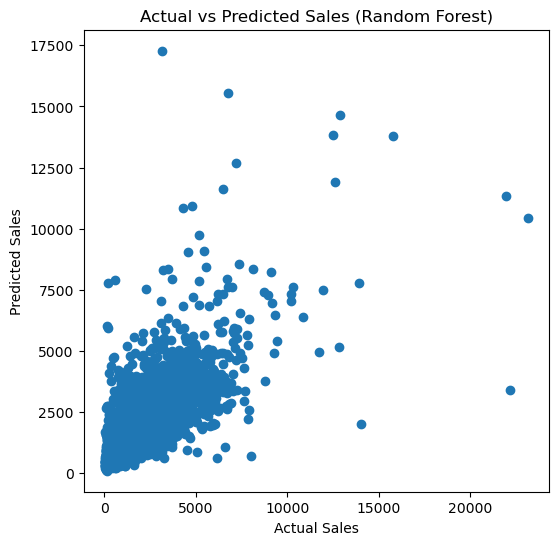

In [26]:
y_pred_rf = rf_pipeline.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()


In [27]:
best_model = rf_pipeline
print("Best model selected: Random Forest Regressor")


Best model selected: Random Forest Regressor


In [35]:
import joblib
joblib.dump(rf_pipeline, 'big_sales_model.pkl')


['big_sales_model.pkl']